In [13]:
import pandas as pd
import os
print(os.getcwd())


# Load the first CSV file into a DataFrame
df_togo = pd.read_csv('../../data/togo-dapaong_qc.csv')

# Display the first few rows of the dataframe to understand its structure
df_togo.head()


/home/libanabduba/Documents/Kifiya AIM/Kifiya-AIM/Week 0/src/notebooks


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## Summary Statistics

Let's calculate the mean, median, standard deviation, and other statistical measures for each numeric column to understand the data distribution

In [14]:
# Calculate summary statistics
summary_stats = df_togo.describe().transpose()

# Display the summary statistics
summary_stats

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,230.555040,322.532347,-12.7,-2.2,2.1,442.400,1424.0
DNI,525600.0,151.258469,250.956962,0.0,0.0,0.0,246.400,1004.5
DHI,525600.0,116.444352,156.520714,0.0,0.0,2.5,215.700,805.7
ModA,525600.0,226.144375,317.346938,0.0,0.0,4.4,422.525,1380.0
ModB,525600.0,219.568588,307.932510,0.0,0.0,4.3,411.000,1367.0
Tamb,525600.0,27.751788,4.758023,14.9,24.2,27.2,31.100,41.4
RH,525600.0,55.013160,28.778732,3.3,26.5,59.3,80.800,99.8
WS,525600.0,2.368093,1.462668,0.0,1.4,2.2,3.200,16.1
WSgust,525600.0,3.229490,1.882565,0.0,1.9,2.9,4.400,23.1
WSstdev,525600.0,0.557740,0.268923,0.0,0.4,0.5,0.700,4.7


The summary statistics for the Togo-Dapaong data have been calculated and displayed. These statistics include the mean, median, standard deviation, and other key measures for each numeric column, providing an initial understanding of the data distribution.

Next, I will perform a data quality check to look for missing values, outliers, or incorrect entries, especially in columns like GHI, DNI, and DHI, as well as sensor readings (ModA, ModB) and wind speed data (WS, WSgust). Let's proceed with that analysis. ​​

In [15]:
# Checking for missing values
missing_values = df_togo.isnull().sum()

# Checking for negative values where only positive should exist (e.g., GHI, DNI, DHI)
negative_values = {
    'GHI': (df_togo['GHI'] < 0).sum(),
    'DNI': (df_togo['DNI'] < 0).sum(),
    'DHI': (df_togo['DHI'] < 0).sum(),
    'ModA': (df_togo['ModA'] < 0).sum(),
    'ModB': (df_togo['ModB'] < 0).sum(),
    'WS': (df_togo['WS'] < 0).sum(),
    'WSgust': (df_togo['WSgust'] < 0).sum(),
}

# Checking for outliers using Z-scores
from scipy.stats import zscore

# Calculate Z-scores for relevant columns
z_scores = df_togo[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].apply(zscore)

# Flag data points with Z-scores greater than 3 or less than -3
outliers = (z_scores.abs() > 3).sum()

# Displaying the results
missing_values, negative_values, outliers


(Timestamp             0
 GHI                   0
 DNI                   0
 DHI                   0
 ModA                  0
 ModB                  0
 Tamb                  0
 RH                    0
 WS                    0
 WSgust                0
 WSstdev               0
 WD                    0
 WDstdev               0
 BP                    0
 Cleaning              0
 Precipitation         0
 TModA                 0
 TModB                 0
 Comments         525600
 dtype: int64,
 {'GHI': 257385,
  'DNI': 0,
  'DHI': 0,
  'ModA': 0,
  'ModB': 0,
  'WS': 0,
  'WSgust': 0},
 GHI        305
 DNI       1062
 DHI       3415
 ModA       137
 ModB       206
 WS        3510
 WSgust    3915
 dtype: int64)

Here's the result of the data quality check:

#### 1.Missing Values:

The Comments column has 525,600 missing values, which means this column is entirely null.
All other columns do not have missing values.

#### 2.Negative Values:

The GHI (Global Horizontal Irradiance) column contains 257,385 negative values, which is unusual since GHI should typically be non-negative.
No negative values were found in the DNI, DHI, ModA, ModB, WS, and WSgust columns.

#### 3.Outliers:

The number of outliers flagged by Z-score analysis (Z-scores > 3 or < -3) in each column is as follows:
GHI: 305 outliers
DNI: 1,062 outliers
DHI: 3,415 outliers
ModA: 137 outliers
ModB: 206 outliers
WS: 3,510 outliers
WSgust: 3,915 outliers
The presence of negative values in the GHI column and the flagged outliers suggest that data cleaning is necessary. Next, I will move on to the time series analysis, plotting line graphs for GHI, DNI, DHI, and Tamb over time to observe patterns, trends, and anomalies.

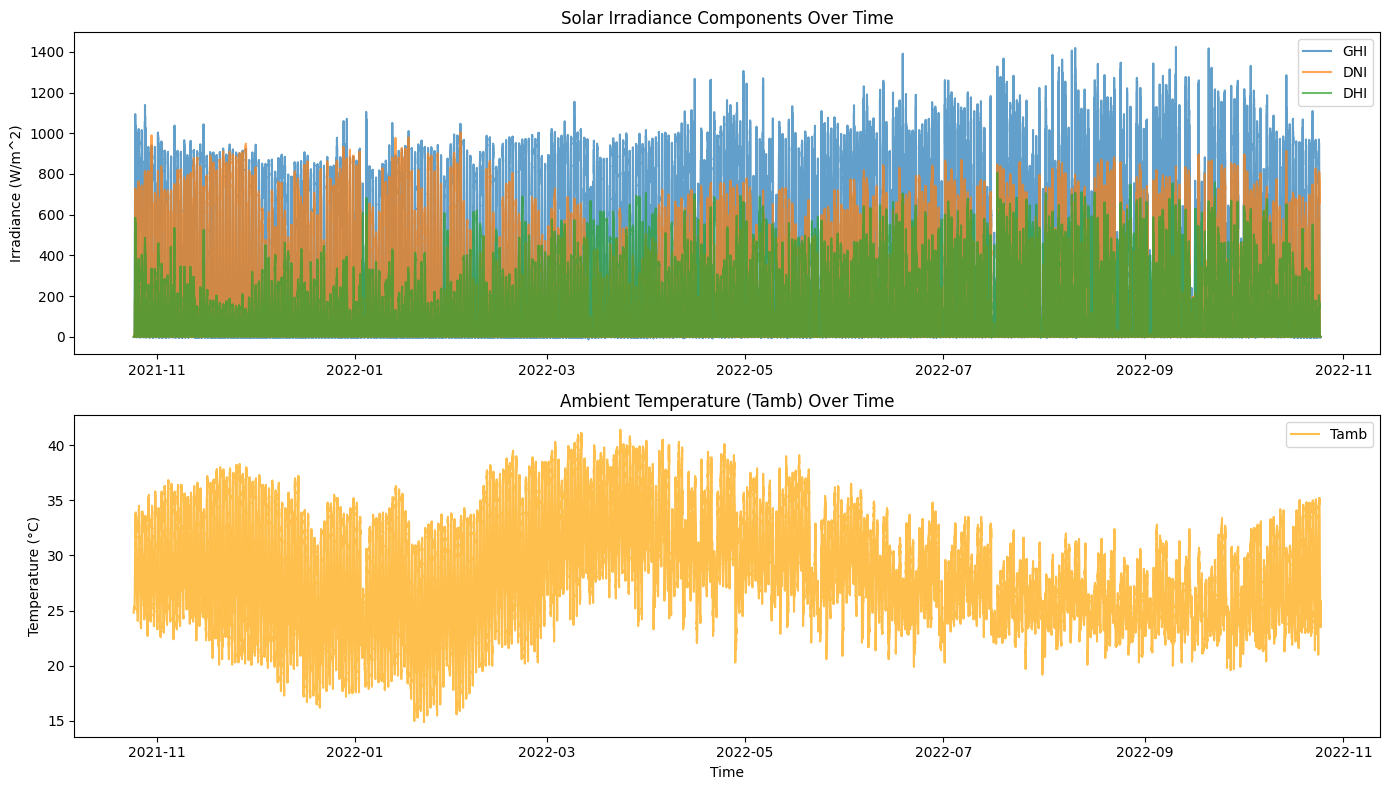

In [16]:
import matplotlib.pyplot as plt

# Convert 'Timestamp' column to datetime format
df_togo['Timestamp'] = pd.to_datetime(df_togo['Timestamp'])

# Set the Timestamp as the index for easier plotting
df_togo.set_index('Timestamp', inplace=True)

# Plotting GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(df_togo['GHI'], label='GHI', alpha=0.7)
plt.plot(df_togo['DNI'], label='DNI', alpha=0.7)
plt.plot(df_togo['DHI'], label='DHI', alpha=0.7)
plt.title('Solar Irradiance Components Over Time')
plt.ylabel('Irradiance (W/m^2)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_togo['Tamb'], label='Tamb', color='orange', alpha=0.7)
plt.title('Ambient Temperature (Tamb) Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()


The time series plots for GHI, DNI, DHI, and Tamb over time are displayed above. These plots allow us to observe patterns, trends, and any anomalies in solar irradiance and ambient temperature over the recorded period.

Next, I will evaluate the impact of cleaning (using the 'Cleaning' column) on the sensor readings (ModA, ModB) over time. ​

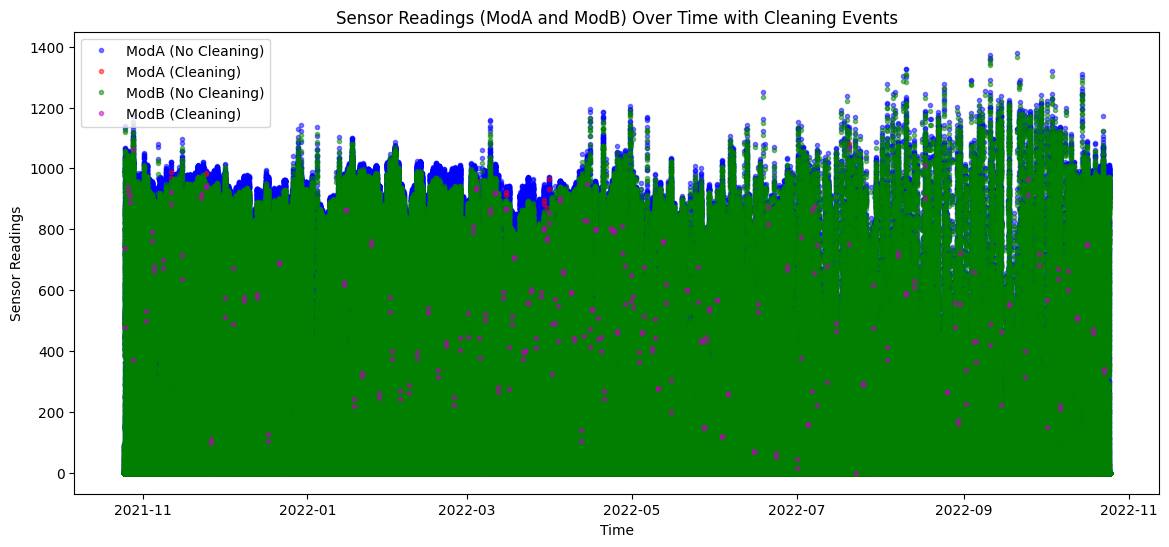

In [17]:
# Plotting ModA and ModB over time with respect to Cleaning
plt.figure(figsize=(14, 6))

plt.plot(df_togo[df_togo['Cleaning'] == 0].index, df_togo[df_togo['Cleaning'] == 0]['ModA'], 'b.', label='ModA (No Cleaning)', alpha=0.5)
plt.plot(df_togo[df_togo['Cleaning'] == 1].index, df_togo[df_togo['Cleaning'] == 1]['ModA'], 'r.', label='ModA (Cleaning)', alpha=0.5)
plt.plot(df_togo[df_togo['Cleaning'] == 0].index, df_togo[df_togo['Cleaning'] == 0]['ModB'], 'g.', label='ModB (No Cleaning)', alpha=0.5)
plt.plot(df_togo[df_togo['Cleaning'] == 1].index, df_togo[df_togo['Cleaning'] == 1]['ModB'], 'm.', label='ModB (Cleaning)', alpha=0.5)

plt.title('Sensor Readings (ModA and ModB) Over Time with Cleaning Events')
plt.ylabel('Sensor Readings')
plt.xlabel('Time')
plt.legend()
plt.show()


The plot above illustrates the sensor readings (ModA and ModB) over time, differentiating between periods when cleaning was performed (marked in red for ModA and magenta for ModB) and when it was not (blue for ModA and green for ModB). This helps visualize the impact of cleaning on the sensor readings.

Next, I'll proceed with a correlation analysis, using heatmaps to visualize the correlations between solar radiation components (GHI, DNI, DHI) and temperature measures (TModA, TModB). Additionally, I'll investigate the relationship between wind conditions (WS, WSgust, WD) and solar irradiance using scatter matrices. ​

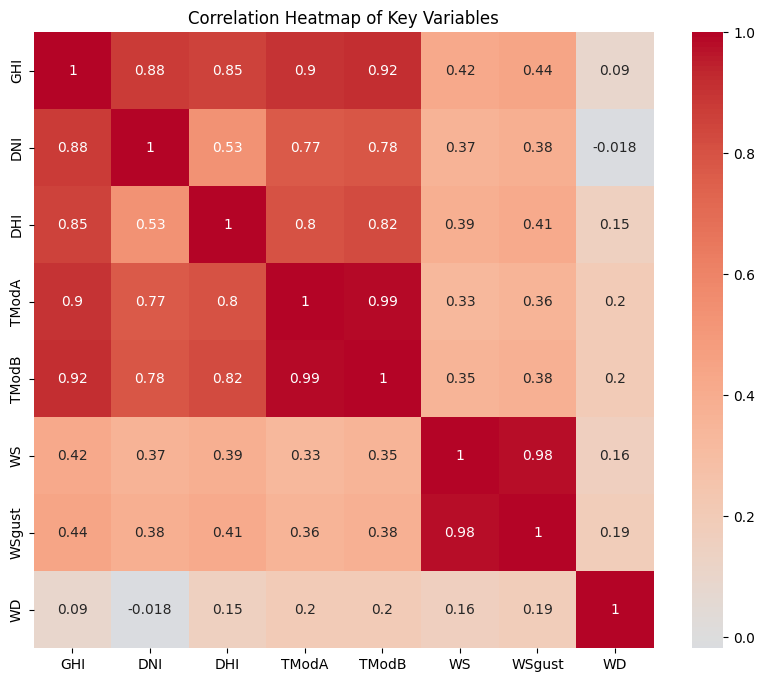

In [18]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df_togo[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

The correlation heatmap above visualizes the relationships between key variables, including solar radiation components (GHI, DNI, DHI), temperature measures (TModA, TModB), and wind conditions (WS, WSgust, WD).

This helps in understanding how these variables are interrelated. For example, you can observe the strength and direction (positive or negative) of correlations between these factors.

Next, I will perform a wind analysis using polar plots to identify trends and significant wind events by showing the distribution of wind speed and direction. ​

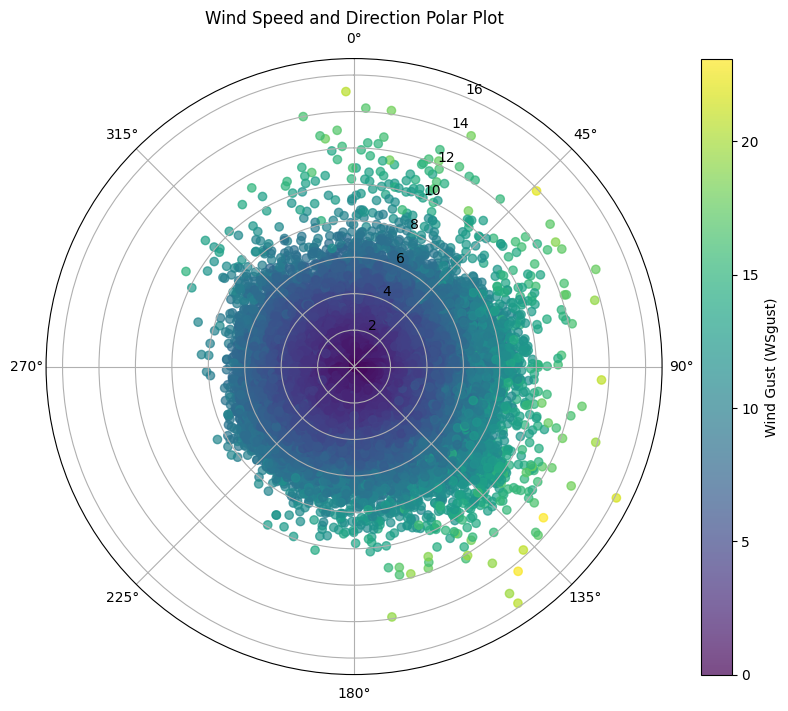

In [19]:
import numpy as np

# Convert wind direction from degrees to radians for polar plot
wd_rad = np.deg2rad(df_togo['WD'])

# Create a polar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Plot wind speed vs. wind direction
sc = ax.scatter(wd_rad, df_togo['WS'], c=df_togo['WSgust'], cmap='viridis', alpha=0.7)

plt.title('Wind Speed and Direction Polar Plot')
plt.colorbar(sc, label='Wind Gust (WSgust)')
ax.set_theta_zero_location('N')  # Set the zero degree at the top (North)
ax.set_theta_direction(-1)  # Set the direction clockwise

plt.show()


The polar plot above represents wind speed and direction, with the color indicating wind gusts (WSgust). This visualization helps identify the distribution of wind speeds and directions, as well as any significant wind events.

Next, I'll examine how relative humidity (RH) might influence temperature readings and solar radiation. I'll create scatter plots to explore these relationships. ​

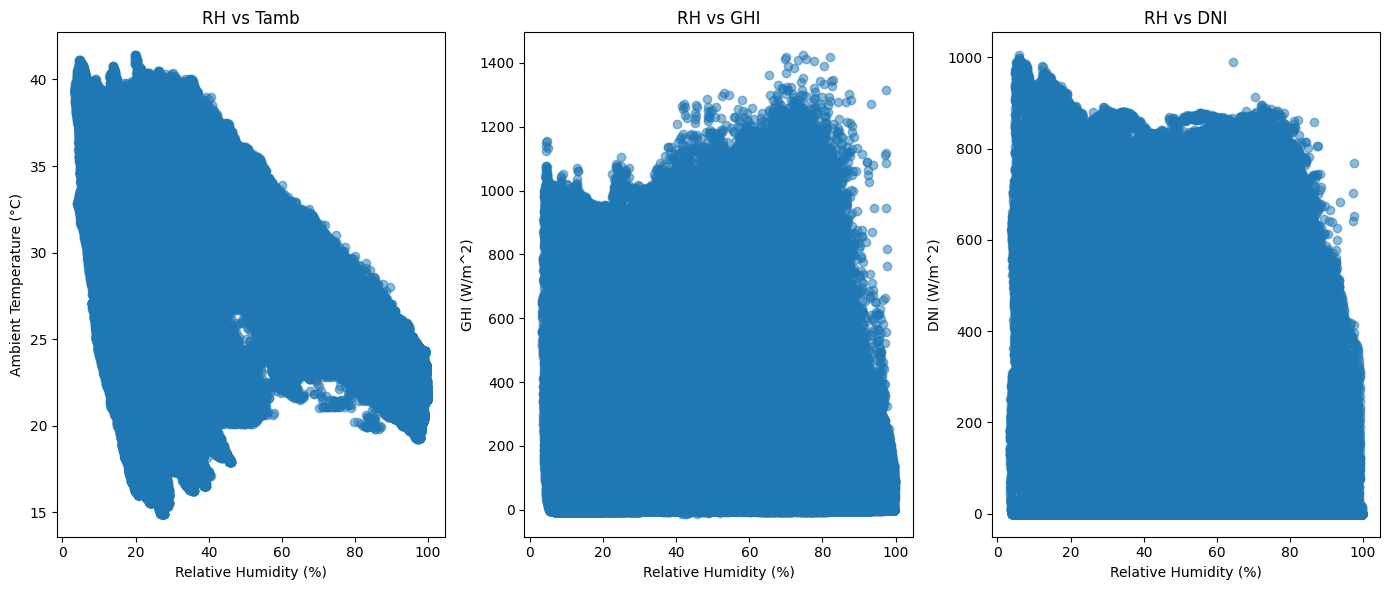

In [20]:
# Scatter plot for RH vs. Tamb, GHI, and DNI
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.scatter(df_togo['RH'], df_togo['Tamb'], alpha=0.5)
plt.title('RH vs Tamb')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')

plt.subplot(1, 3, 2)
plt.scatter(df_togo['RH'], df_togo['GHI'], alpha=0.5)
plt.title('RH vs GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m^2)')

plt.subplot(1, 3, 3)
plt.scatter(df_togo['RH'], df_togo['DNI'], alpha=0.5)
plt.title('RH vs DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m^2)')

plt.tight_layout()
plt.show()


Temperature Analysis: RH vs. Temperature and Solar Radiation
Let's proceed with creating scatter plots to visualize the relationship between relative humidity (RH) and temperature readings (Tamb, TModA, TModB), as well as solar radiation (GHI, DNI).

I'll generate these plots now. 

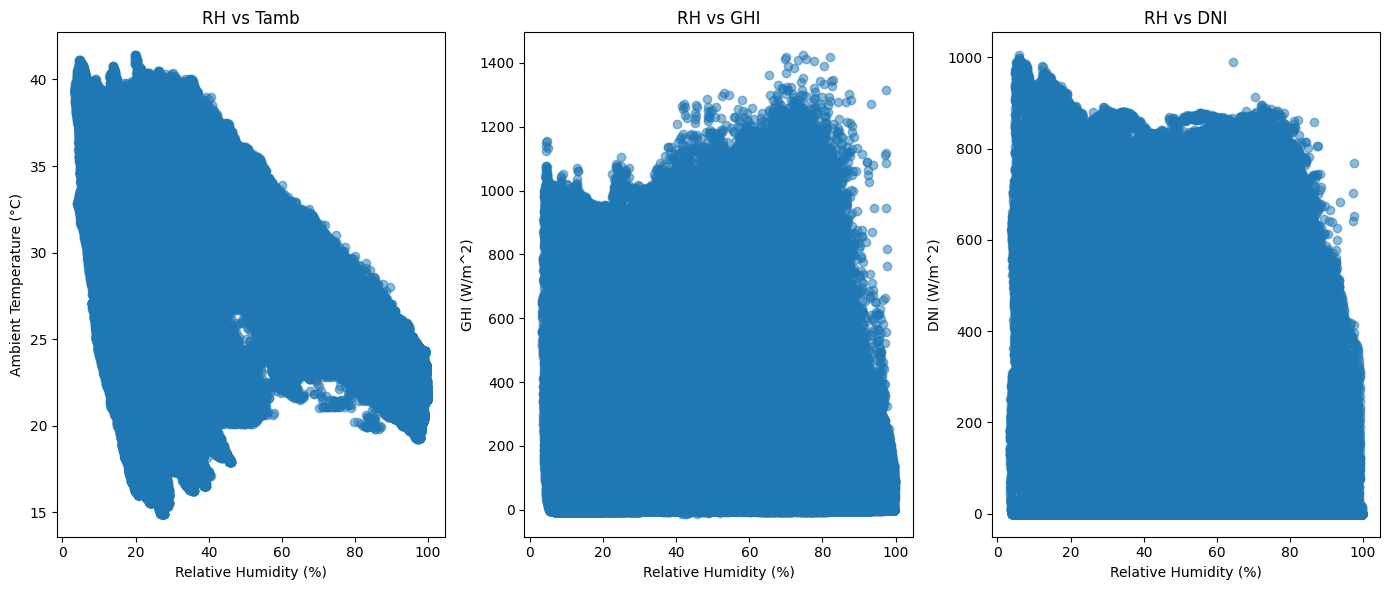

In [21]:
# Scatter plot for RH vs. Tamb, GHI, and DNI
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.scatter(df_togo['RH'], df_togo['Tamb'], alpha=0.5)
plt.title('RH vs Tamb')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')

plt.subplot(1, 3, 2)
plt.scatter(df_togo['RH'], df_togo['GHI'], alpha=0.5)
plt.title('RH vs GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m^2)')

plt.subplot(1, 3, 3)
plt.scatter(df_togo['RH'], df_togo['DNI'], alpha=0.5)
plt.title('RH vs DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m^2)')

plt.tight_layout()
plt.show()


The scatter plots above show the relationship between relative humidity (RH) and ambient temperature (Tamb), as well as solar radiation components (GHI, DNI). Here are some observations:

RH vs Tamb: There is a noticeable pattern where higher relative humidity tends to be associated with lower ambient temperatures. This is expected as high humidity is often linked to cooler conditions.

RH vs GHI and DNI: The solar radiation components (GHI and DNI) also show some correlation with relative humidity. Generally, lower relative humidity is associated with higher solar radiation, which makes sense as clear skies (often accompanied by lower humidity) allow more sunlight to reach the surface.

## Next Steps

Now, let's move on to creating histograms to visualize the frequency distribution of key variables like GHI, DNI, DHI, WS, and temperatures (Tamb, TModA, TModB). These histograms will help us understand the distribution and potential skewness of the data.

I'll generate these histograms next.

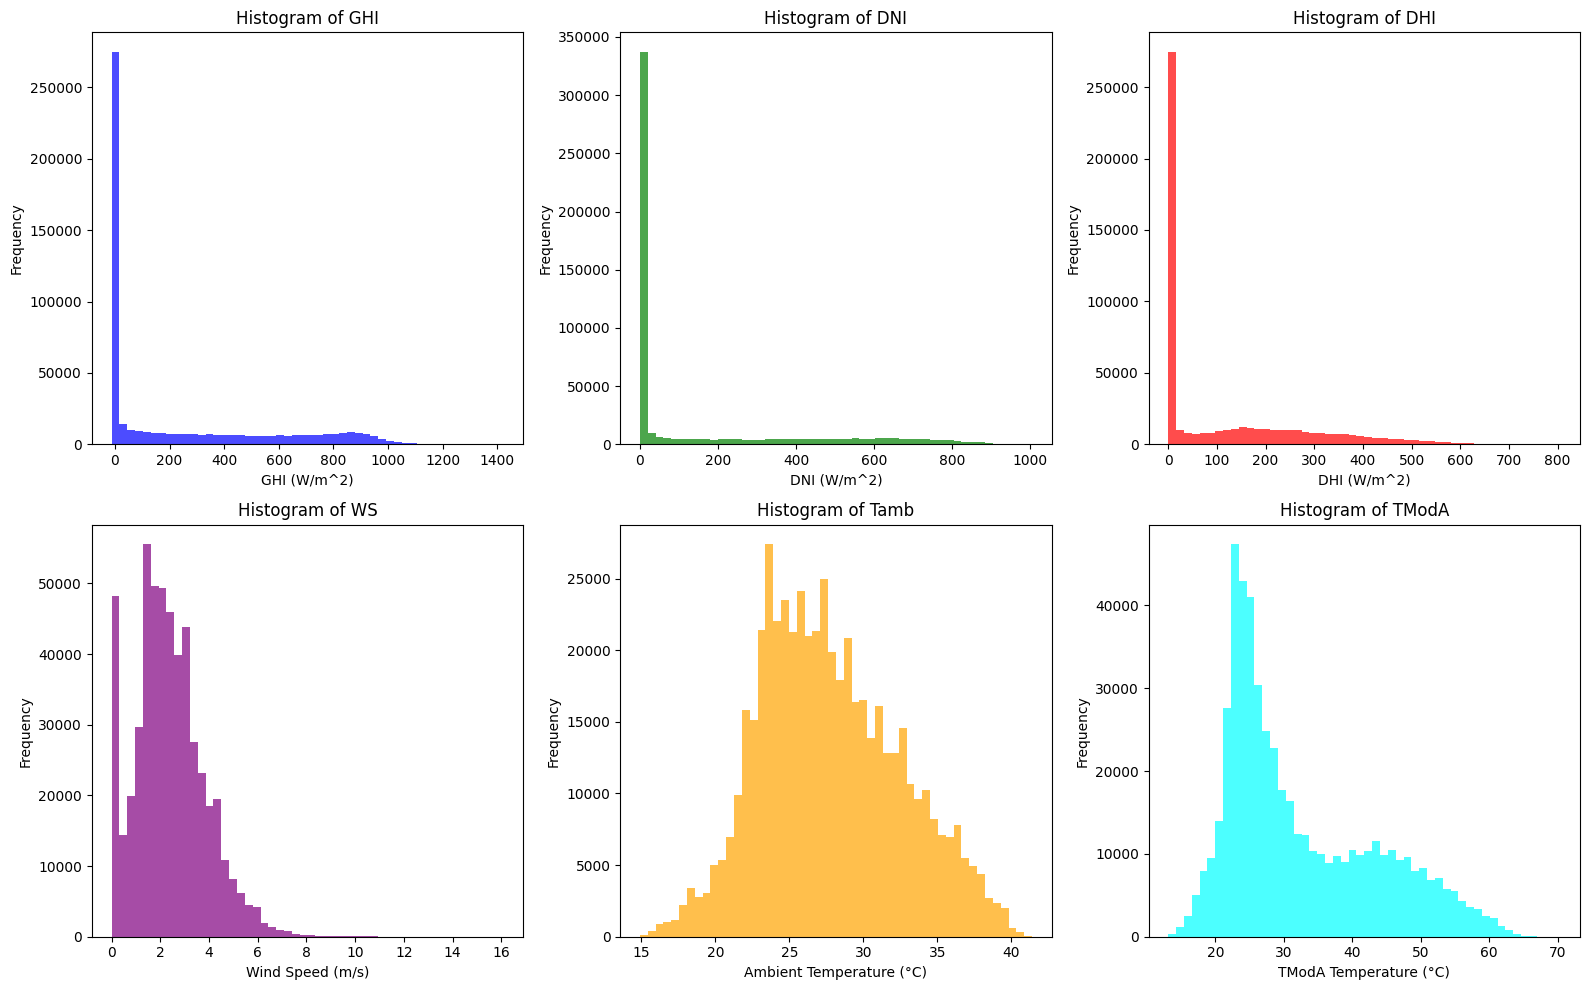

In [22]:
# Plot histograms for GHI, DNI, DHI, WS, and temperatures
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.hist(df_togo['GHI'], bins=50, alpha=0.7, color='blue')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m^2)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(df_togo['DNI'], bins=50, alpha=0.7, color='green')
plt.title('Histogram of DNI')
plt.xlabel('DNI (W/m^2)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df_togo['DHI'], bins=50, alpha=0.7, color='red')
plt.title('Histogram of DHI')
plt.xlabel('DHI (W/m^2)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(df_togo['WS'], bins=50, alpha=0.7, color='purple')
plt.title('Histogram of WS')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(df_togo['Tamb'], bins=50, alpha=0.7, color='orange')
plt.title('Histogram of Tamb')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
plt.hist(df_togo['TModA'], bins=50, alpha=0.7, color='cyan')
plt.title('Histogram of TModA')
plt.xlabel('TModA Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms above provide insights into the distribution of key variables:

Solar Radiation (GHI, DNI, DHI): These variables are heavily skewed towards lower values, with a large number of instances where the readings are close to zero. This is typical for irradiance data, especially during nighttime or cloudy periods.

Wind Speed (WS): The wind speed distribution shows a peak around lower wind speeds, with very few occurrences of higher speeds.

Ambient Temperature (Tamb): The temperature data (Tamb) is more normally distributed, with most readings clustered between 20°C and 35°C.

Module Temperature (TModA): TModA shows a broader distribution, with readings spread across a wider temperature range, likely influenced by both ambient conditions and solar irradiance.